### Network growth

1. Search "History" in section headings.
2. Find a list of years.
3. Use the first one as when the birth year of the idea.
4. If no "History" section, then look backwards in the graph to a page that does, and use that.

#### Visualization
* Use ~~[bokeh](https://bokeh.pydata.org/en/latest/docs/user_guide/graph.html)~~ ~~[webweb](https://webwebpage.github.io/)~~ [d3](https://observablehq.com/@d3/force-directed-graph).
* Use slider to show growth in network

### Label with years

In [1]:
import networkx as nx

path_saved = '/Users/harangju/Box Sync/Research/my papers/wikipedia paper/data/prelim data/'
# natural & physical sciences
topics = ['anatomy', 'biochemistry', 'cognitive science', 'evolutionary biology',
          'genetics', 'immunology', 'molecular biology']
topics += ['chemistry', 'biophysics', 'energy', 'optics', 
           'earth science', 'geology', 'meteorology']
# philosophy
# topics += []
topics += ['philosophy of language', 'philosophy of law', 
           'philosophy of mind', 'philosophy of science']
# social sciences
topics += ['economics', 'accounting', 'education', 'linguistics', 'law', 'psychology', 'sociology']
# technology & applied sciences
topics += ['electronics', 'software engineering', 'robotics']
topics += ['physics']

graphs = {}
for topic in topics:
    graphs[topic] = nx.read_gexf(path_saved + topic + '_d2.gexf')
graphs

{'anatomy': <networkx.classes.digraph.DiGraph at 0x7f98105a3358>,
 'biochemistry': <networkx.classes.digraph.DiGraph at 0x7f9828533b00>,
 'cognitive science': <networkx.classes.digraph.DiGraph at 0x7f98284de6a0>,
 'evolutionary biology': <networkx.classes.digraph.DiGraph at 0x7f9828457240>,
 'genetics': <networkx.classes.digraph.DiGraph at 0x7f9828764438>,
 'immunology': <networkx.classes.digraph.DiGraph at 0x7f982855def0>,
 'molecular biology': <networkx.classes.digraph.DiGraph at 0x7f9841107668>,
 'chemistry': <networkx.classes.digraph.DiGraph at 0x7f9810a867b8>,
 'biophysics': <networkx.classes.digraph.DiGraph at 0x7f98411927b8>,
 'energy': <networkx.classes.digraph.DiGraph at 0x7f9810aad208>,
 'optics': <networkx.classes.digraph.DiGraph at 0x7f982877ea58>,
 'earth science': <networkx.classes.digraph.DiGraph at 0x7f98288ac978>,
 'geology': <networkx.classes.digraph.DiGraph at 0x7f982888d400>,
 'meteorology': <networkx.classes.digraph.DiGraph at 0x7f982855d9e8>,
 'philosophy of langu

In [2]:
import wiki

path_base = '/Users/harangju/Developer/data/wiki/'
name_xml = 'enwiki-20190801-pages-articles-multistream.xml.bz2'
name_index = 'enwiki-20190801-pages-articles-multistream-index.txt.bz2'
path_xml = path_base + name_xml
path_index = path_base + name_index
dump = wiki.Dump(path_xml, path_index)

In [3]:
_graphs = {'robotics': graphs['robotics']}
for topic, graph in graphs.items():
    print('Topic: ' + topic)
    for node in graph.nodes:
        dump.load_page(node)
        graph.nodes[node]['year'] = dump.years[0] if len(dump.years)>0 else None

Topic: anatomy
Dump: Loading index...
Dump: Loaded.
Topic: biochemistry
Topic: cognitive science
Topic: evolutionary biology
Topic: genetics
Topic: immunology
Topic: molecular biology
Topic: chemistry
Topic: biophysics
Topic: energy
Topic: optics
Topic: earth science
Topic: geology
Topic: meteorology
Topic: philosophy of language
Topic: philosophy of law
Topic: philosophy of mind
Topic: philosophy of science
Topic: economics
Topic: accounting
Topic: education
Topic: linguistics
Topic: law
Topic: psychology
Topic: sociology
Topic: electronics
Topic: software engineering
Topic: robotics
Topic: physics


In [4]:
graphs['robotics'].nodes['Robotics']

{'label': 'Robotics', 'year': 1900}

#### Fill in nodes without years

In [82]:
def fill_empty_nodes(graph, full_parents=True):
    """
    Returns
    -------
    bool
        whether at least 1 empty node was filled
    """
    empty_nodes = [n for n in graph.nodes if not graph.nodes[n]['year']]
    for node in empty_nodes:
        years = [graph.nodes[p]['year'] for p in graph.predecessors(node)]
        if not years:
            continue
        if full_parents:
            if [] not in years:
                graph.nodes[node]['year'] = max(years)
                return True
        else:
            years_filtered = [y for y in years if y]
            if years_filtered:
                graph.nodes[node]['year'] = max(years_filtered)
                return True
    return False

In [86]:
_graphs = {'biochemistry': graphs['biochemistry']}
for topic, graph in _graphs.items():
    nodes = graph.nodes
    print('Filling in nodes with full parents...')
    nodes_filled = True
    while nodes_filled:
        nodes_filled = fill_empty_nodes(graph, full_parents=True)
    print('Filling in nodes without full parents...')
    nodes_filled = True
    while nodes_filled:
        nodes_filled = fill_empty_nodes(graph, full_parents=False)

Filling in nodes with full parents...
Filling in nodes without full parents...


#### Save graphs

In [87]:
for topic, graph in _graphs.items():
    path_save = path_base + 'graphs/dated_' + 'filled_' + topic + '.gexf'
    nx.write_gexf(graphs[topic], path_save)

#### Load graphs

In [ ]:
import networkx as nx

graphs = {}
for topic in topics:
    graphs[topic] = nx.read_gexf(path_base + 'graphs/dated_' + topic + '.gexf')
graphs

### Visualize growth

* gephi [tutorial](https://seinecle.github.io/gephi-tutorials/generated-html/converting-a-network-with-dates-into-dynamic.html)

### Clique community growth

In [92]:
import networkx as nx

In [105]:
# cliques = nx.enumerate_all_cliques(nx.Graph(graphs['biochemistry']))
cliques = nx.find_cliques(nx.Graph(graphs['biochemistry']))
list(cliques)[100:110]

[['Acetylcholine', 'Neurotransmitter', 'Receptor (biochemistry)'],
 ['Nucleic acid hybridization', 'Dna', 'Polymerase chain reaction'],
 ['Nucleic acid hybridization', 'Rna'],
 ['Nucleic acid hybridization', 'Dna replication'],
 ['Electron configuration', 'Quantum chemistry'],
 ['Electron configuration', 'Atom', 'Redox', 'Molecule'],
 ['Electron configuration', 'Atom', 'Redox', 'Electron'],
 ['Electron configuration', 'Atom', 'Molecule', 'Molecular orbital'],
 ['Potassium', 'Hydrogen', 'Chemical element', 'Atomic number', 'Oxygen'],
 ['Potassium', 'Action potential']]

### Persistent homology

* Ripser [paper](https://www.theoj.org/joss-papers/joss.00925/10.21105.joss.00925.pdf) [code](https://github.com/scikit-tda/ripser.py) (fast)
* Dionysus 2 [code](https://mrzv.org/software/dionysus2/) (representative examples)
* Nico's [code](https://github.com/nhchristianson/Math-text-semantic-networks)

In [88]:
import numpy as np
import ripser
import persim

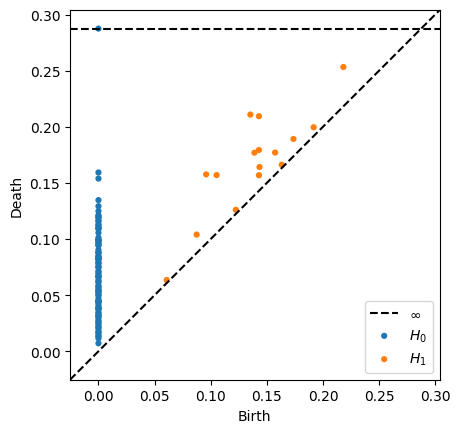

In [107]:
data = np.random.random((100,2))
diagrams = ripser.ripser(data)['dgms']
persim.plot_diagrams(diagrams, show=True)